# Variational Monte Carlo for the Harmonic Oscillator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
try: plt.style.use('./notebook.mplstyle')
except: pass

π = np.pi

In [2]:
def transition_probability(x,x̄,α):
    return np.exp(-2*α*(x̄**2-x**2))

def Elocal(x,α):
    return α + x**2*(0.5-2*α**2)

In [3]:
def vmc(num_walkers,num_MC_steps,num_equil_steps,α,δ=1.0):
    
    # initilaize walkers
    walkers = -0.5 + np.random.rand(num_walkers)
    
    # initialize energy and number of accepted updates
    E = 0.0
    E2 = 0.0
    num_accepted = 0
    
    # for each MC step
    for step in range(num_MC_steps):
        
        # generate new walker positions 
        new_walkers = np.random.normal(loc=walkers, scale=δ, size=num_walkers)
        
        # test new walkers
        for i in range(num_walkers):
            if np.random.random() < transition_probability(walkers[i],new_walkers[i],α):
                num_accepted += 1
                walkers[i] = new_walkers[i]
                
            # measure observables
            if step > num_equil_steps:
                cE = Elocal(walkers[i],α)
                E += cE
                E2 += cE*cE
                
    # normalize energy and compute standard error
    E /= (num_MC_steps - num_equil_steps)*num_walkers
    E2 /= (num_MC_steps - num_equil_steps)*num_walkers
    δE = np.sqrt((E2-E*E)/(num_MC_steps - num_equil_steps))
    
    return E, δE, num_accepted/(num_MC_steps*num_walkers)

In [4]:
α = 0.45
num_walkers = 100
num_MC_steps = 10000
num_equil_steps = 1000

In [5]:
E,δE,accept_ratio = vmc(num_walkers,num_MC_steps,num_equil_steps,α)

In [6]:
print('E      = %f ± %f' % (E,δE))
print('accept = %4.2f' % accept_ratio)

E      = 0.502703 ± 0.000785
accept = 0.62


In [7]:
Emin = []
δEmin = []
α = np.array([0.45, 0.475, 0.5, 0.525, 0.55])
for cα in α: 
    E,δE,accept_ratio = vmc(num_walkers,num_MC_steps,num_equil_steps,cα)
    Emin.append(E)
    δEmin.append(δE)
    print('%5.3f \t %7.5f ± %f \t %4.2f' % (cα,E,δE,accept_ratio))

0.450 	 0.50262 ± 0.000790 	 0.62
0.475 	 0.50067 ± 0.000387 	 0.61
0.500 	 0.49994 ± 0.000056 	 0.61
0.525 	 0.50044 ± 0.000369 	 0.60
0.550 	 0.50229 ± 0.000711 	 0.59


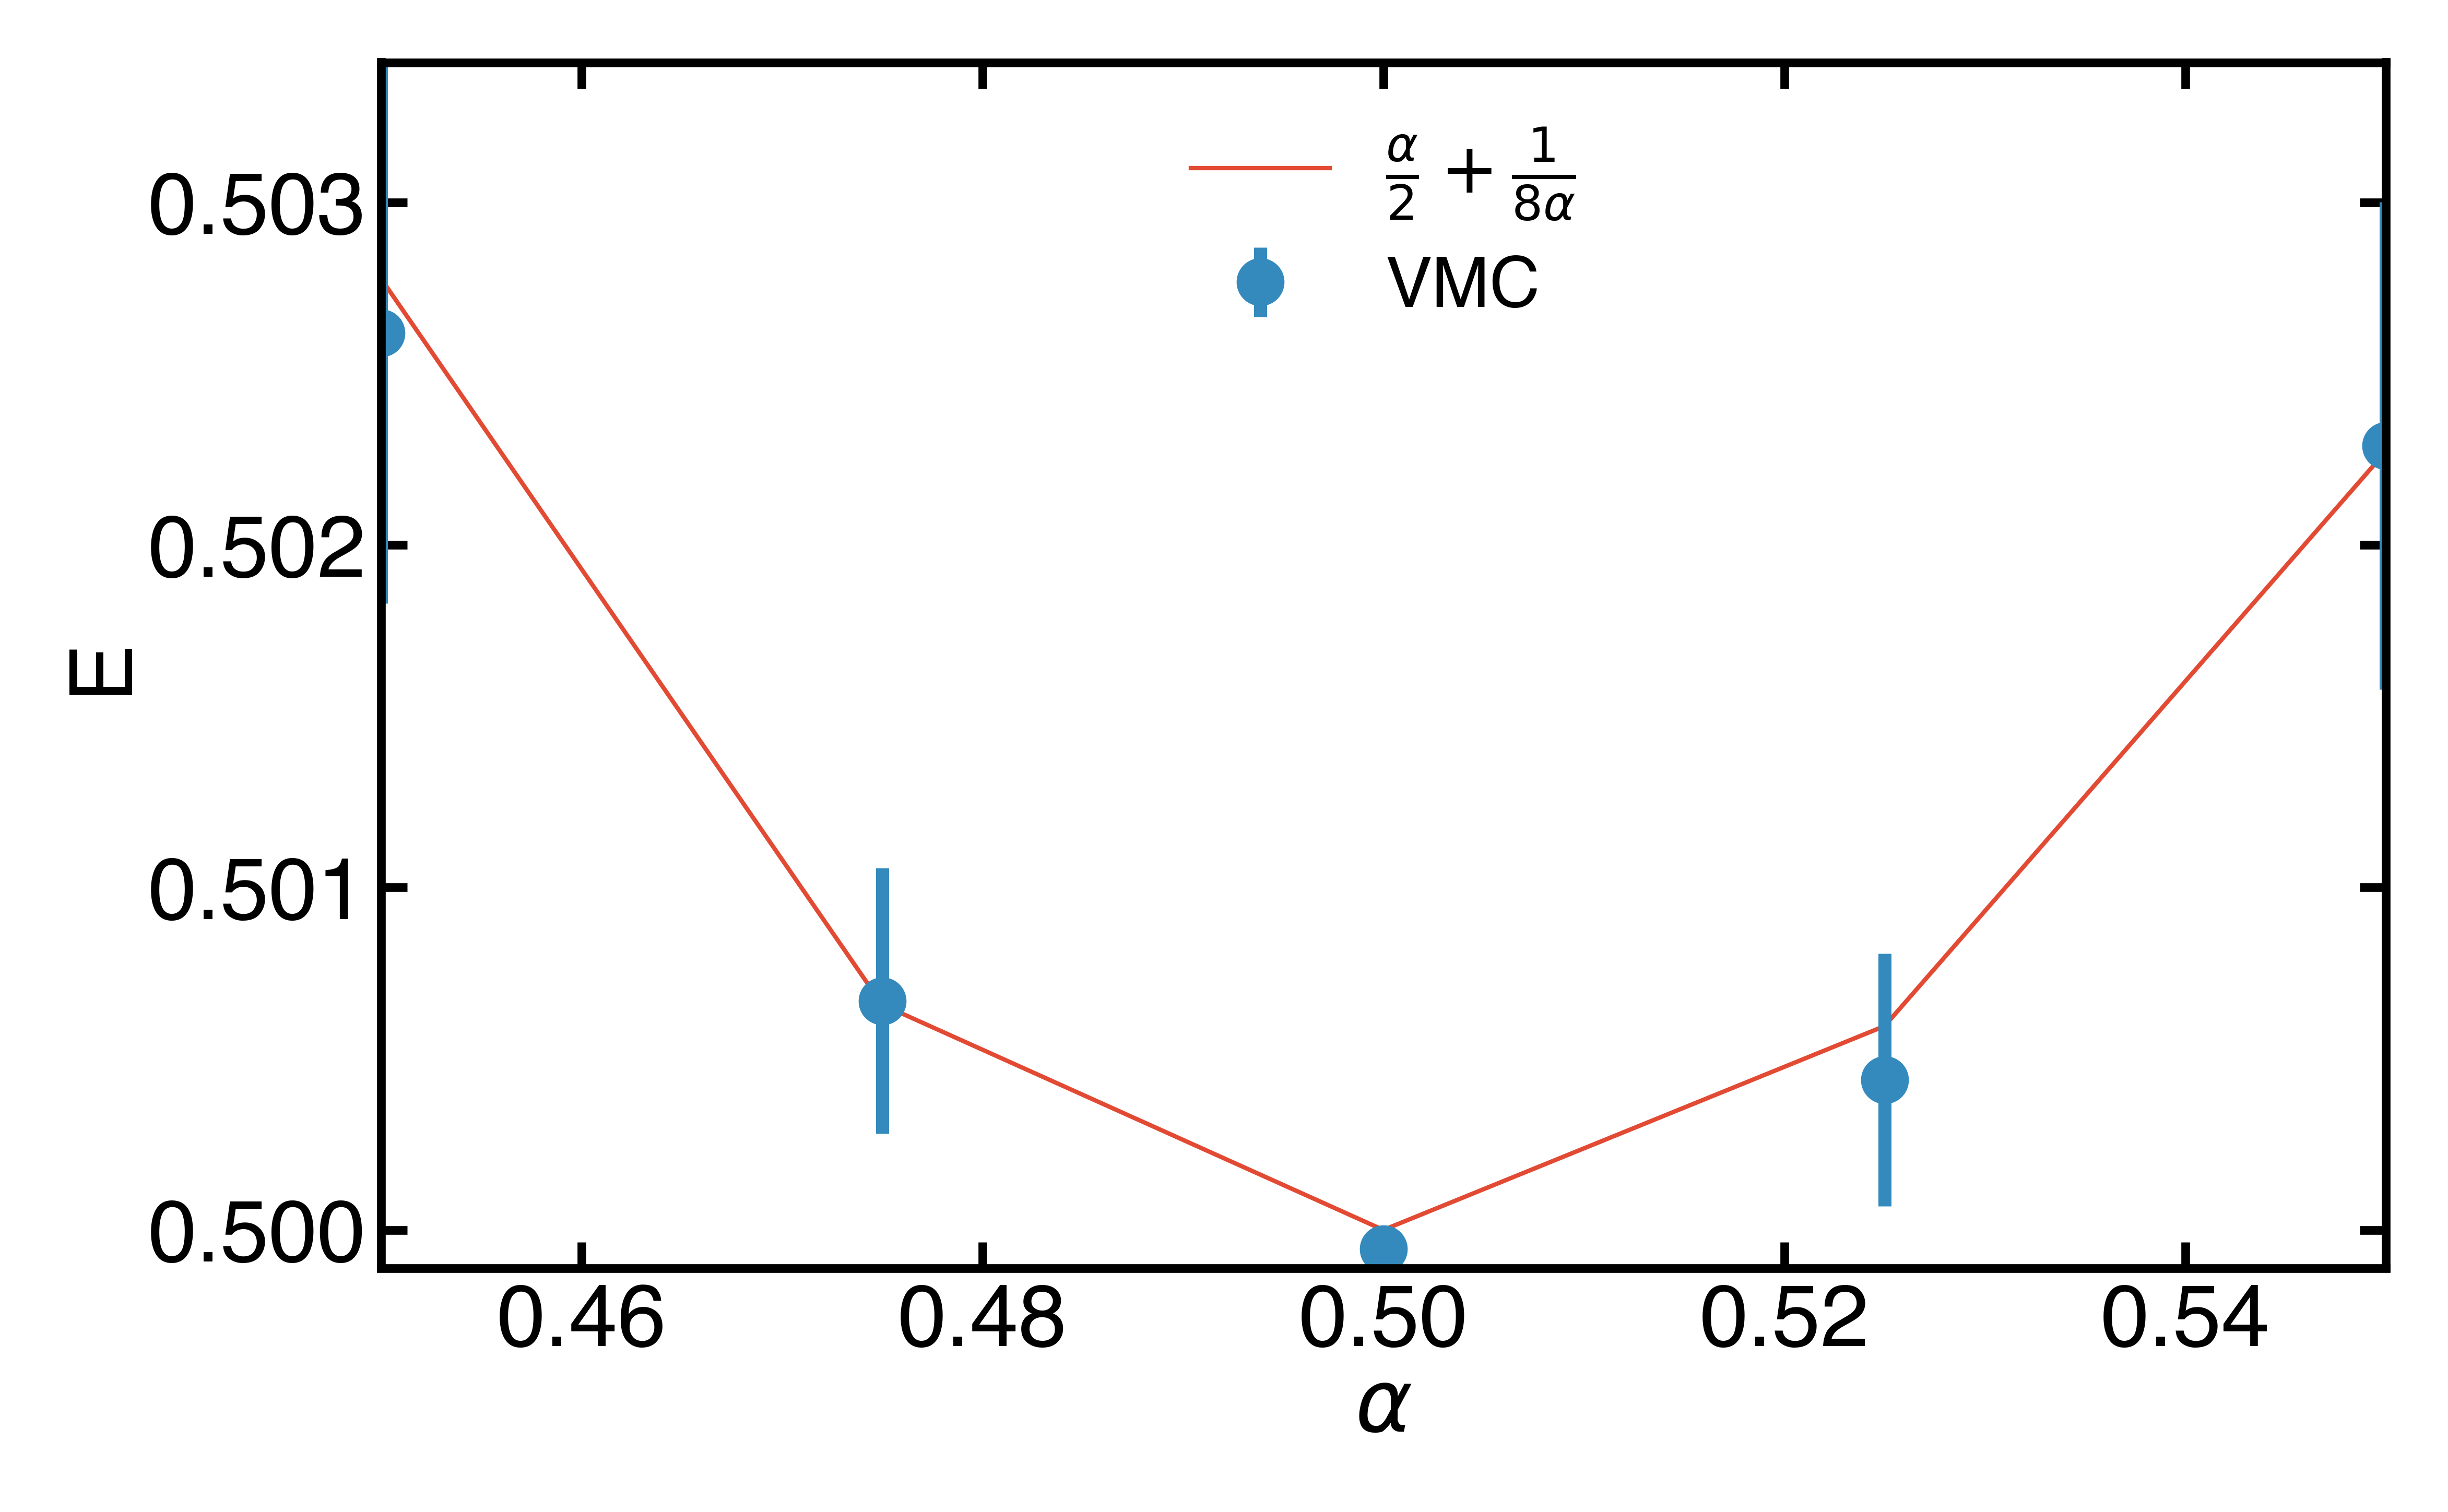

In [9]:
plt.plot(α,0.5*α + 1/(8*α), '-', linewidth=1, label=r'$\frac{\alpha}{2} + \frac{1}{8\alpha}$', zorder=-10)
plt.errorbar(α,Emin,yerr=δEmin, linestyle='None', marker='o', label='VMC')
plt.xlabel(r'$\alpha$')
plt.ylabel('E');
plt.legend(loc='upper center')